# Notebook for Climate Data 

In [1]:
#import packages
import xarray as xr
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#Load Climate Modell 
data_pr = xr.open_dataset('../data/climate_model/PR_data_climatemodel.nc')
data_wind = xr.open_dataset('../data/climate_model/sfcWind_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')
data_humid = xr.open_dataset('../data/climate_model/hurs_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')
data_tempmean = xr.open_dataset('../data/climate_model/tas_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')
data_tempmax = xr.open_dataset('../data/climate_model/tasmax_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')
data_tempmin = xr.open_dataset('../data/climate_model/tasmin_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')

#Datavariables
humid = data_humid.hurs
wind = data_wind.sfcWind
pr = data_pr.pr
tempmean = data_tempmean.tas
tempmax = data_tempmax.tasmax
tempmin = data_tempmin.tasmin

In [2]:
#Example single Data Variable Information
print("Precipitation Data Information: \n")
#relevant Data Dim
print(pr.shape,"",  sep="\n --- ")
# Datenpunkte 
print(data_pr.dims,"", sep=" \n --- ")
# Datenvariablen
print(data_pr.data_vars,"", sep="\n --- ")
#ausfürhliche Version im Text Editor anschauen sonst unvollständig
print(data_pr.info())




Precipitation Data Information: 

(1140, 412, 424)
 --- 
FrozenMappingWarningOnValuesAccess({'time': 1140, 'bnds': 2, 'rlat': 412, 'rlon': 424, 'vertices': 4}) 
 --- 
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 18kB ...
    lon_bnds      (rlat, rlon, vertices) float32 3MB ...
    lat_bnds      (rlat, rlon, vertices) float32 3MB ...
    rotated_pole  int32 4B ...
    pr            (time, rlat, rlon) float32 797MB ...
 --- 
xarray.Dataset {
dimensions:
	time = 1140 ;
	bnds = 2 ;
	rlat = 412 ;
	rlon = 424 ;
	vertices = 4 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:bounds = time_bnds ;
		time:axis = T ;
	datetime64[ns] time_bnds(time, bnds) ;
	float32 lon(rlat, rlon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:bounds = lon_bnds ;
	float32 lon_bnds(rlat, rlon, vertices) ;
	float32 lat(rlat, rlon) ;
		lat:standard_name = latitude ;
		lat:long_name = latitud

In [3]:
#Metadata climate-model
#very similar
print(data_pr.attrs)
print(data_wind.attrs)
print(data_humid.attrs)
print(data_tempmean.attrs)
print(data_tempmax.attrs)

{'source': 'DWD-EPISODES2018', 'institution': 'Deutscher Wetterdienst', 'Conventions': 'CF-1.4', 'contact': 'klima.episodes@dwd.de', 'references': 'http://www.dwd.de/episodes', 'institute_id': 'DWD', 'model_id': 'DWD-EPISODES2018', 'initialization_method': '1', 'physics_version': '1', 'rcm_version_id': 'v1-r1', 'predictor_data': 'NCARv1', 'predictor_spatial_resolution': '0.75deg', 'predictor_typical_domain_size': '10W30E/40N60N', 'predictor_lonrange': '10degW30degE', 'predictor_latrange': '40degN60degN', 'predictor_number_eofs': 'NA', 'predictor_temporal_resolution': 'daily', 'predictor_names': 'zg1000, zg850, zg700, ta1000, ta850, ta700, hur1000, hur850, hur700', 'title': 'DWD-EPISODES2018 model output, forcing MPI-M-MPI-ESM-LR r2i1p1, prepared for CORDEX-ESD rcp26', 'comment': 'CORDEX Europe ESD DWD-EPISODES2018 0.11 deg EUR-11', 'project_id': 'CORDEX-ESD', 'CORDEX_domain': 'EUR-11', 'driving_experiment': 'MPI-M-MPI-ESM-LR, rcp26, r2i1p1', 'driving_model_id': 'MPI-M-MPI-ESM-LR', 'dri

In [4]:
#Merge Datasets
data_all = xr.merge([pr,tempmax,tempmean,tempmin,humid,wind], compat='override')
#conflict in height is overrided
#save height values somewhere else

# Slicing Time and Space to 2024 and Germany 
time_slice_start = "2024-01-16"
time_slice_end   = "2054-01-16"
rlon_slice_min   = -8
rlon_slice_max   = -1
rlat_slice_min   = -4
rlat_slice_max   = 6

data_all_sliced = data_all.sel(time=slice(time_slice_start,time_slice_end),
                              rlon=slice(rlon_slice_min, rlon_slice_max), rlat=slice(rlat_slice_min, rlat_slice_max))

# Datavariables 
humid = data_all_sliced.hurs
wind = data_all_sliced.sfcWind
pr = data_all_sliced.pr
tempmean = data_all_sliced.tas
tempmax = data_all_sliced.tasmax
tempmin = data_all_sliced.tasmin

In [5]:
print("Merged Dataset: \n")
#relevant Data Dim
#print(data_all.pr.shape, "", sep="\n ---")
#Datenpunkte
print(data_all.dims, "", sep="\n ---")
#Datenvariablen 
print(data_all.data_vars,"", sep="\n ---")
#ausfürhliche Version im Text Editor anschauen sonst unvollständig
print(data_all.info(), "", sep="\n ---")

Merged Dataset: 

FrozenMappingWarningOnValuesAccess({'time': 1140, 'rlat': 412, 'rlon': 424})
 ---
Data variables:
    pr       (time, rlat, rlon) float32 797MB ...
    tasmax   (time, rlat, rlon) float32 797MB ...
    tas      (time, rlat, rlon) float32 797MB ...
    tasmin   (time, rlat, rlon) float32 797MB ...
    hurs     (time, rlat, rlon) float32 797MB ...
    sfcWind  (time, rlat, rlon) float32 797MB ...
 ---
xarray.Dataset {
dimensions:
	time = 1140 ;
	rlat = 412 ;
	rlon = 424 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:bounds = time_bnds ;
		time:axis = T ;
	float32 lon(rlat, rlon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:bounds = lon_bnds ;
	float32 lat(rlat, rlon) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:bounds = lat_bnds ;
	float64 rlon(rlon) ;
		rlon:standard_name = grid_longitude ;
		rlon:long

In [6]:
print(data_all.attrs)
# das ist komisch -> aber vtt nicht schlimm 

{'standard_name': 'precipitation_flux', 'long_name': 'Precipitation', 'units': 'kg m-2 s-1', 'grid_mapping': 'rotated_pole', 'cell_methods': 'time: mean'}


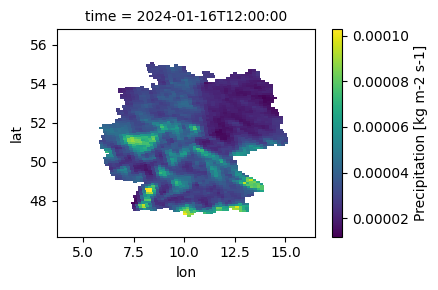

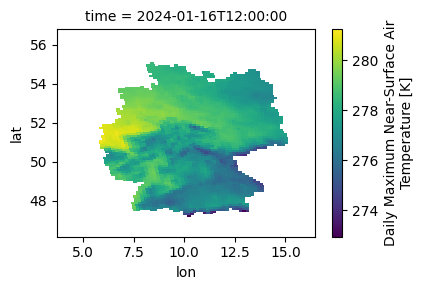

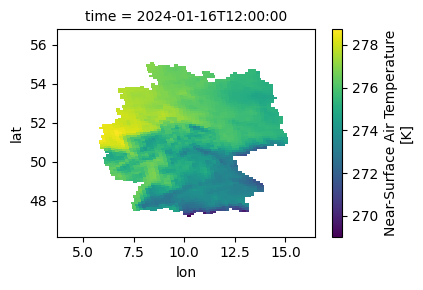

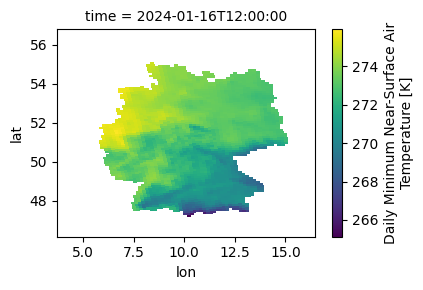

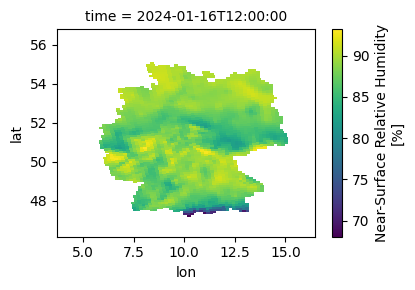

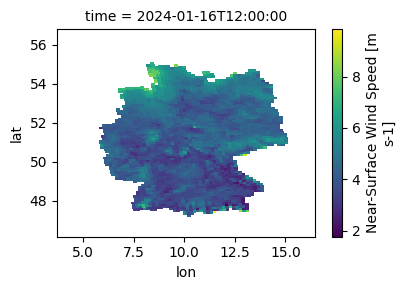

In [7]:
# Plot in Xarray 2024-01-16
data_all_sliced_plot = data_all_sliced.sel(time="2024-01-16")
variables = ['pr', 'tasmax', 'tas', 'tasmin', 'hurs', 'sfcWind']
units = [data_all.pr.attrs['units'], data_all.tasmax.attrs['units'], data_all.tas.attrs['units'],
         data_all.tasmin.attrs['units'], data_all.hurs.attrs['units'], data_all.sfcWind.attrs['units']]
n_vars = len(variables)


for i, var in enumerate(variables):
    data_all_sliced_plot[var].plot(x="lon", y="lat", col="time")

['kg m-2 s-1', 'K', 'K', 'K', '%', 'm s-1']


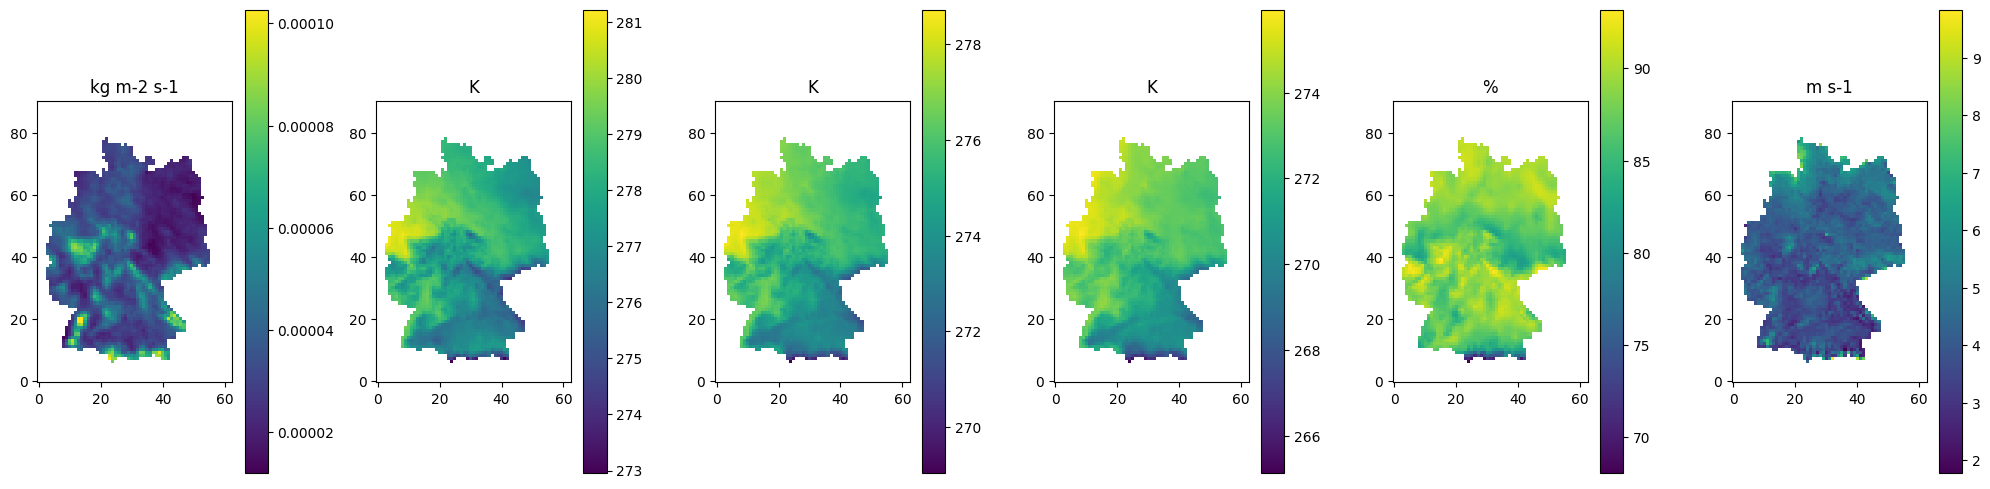

In [8]:
#Plot for with mathplotlib axes labeling not working

data_all_sliced_plot = data_all_sliced.sel(time="2024-01-16")

# Variablen, die geplottet werden sollen
variables = ['pr', 'tasmax', 'tas', 'tasmin', 'hurs', 'sfcWind']
units = [data_all.pr.attrs['units'], data_all.tasmax.attrs['units'], data_all.tas.attrs['units'],
         data_all.tasmin.attrs['units'], data_all.hurs.attrs['units'], data_all.sfcWind.attrs['units']]
n_vars = len(variables)
print(units)
# Subplots erstellen
fig, axes = plt.subplots(nrows=1, ncols=n_vars, figsize=(20, 5))

for i, var in enumerate(variables):
    ax = axes[i]
    data = data_all_sliced_plot[var].squeeze()
    # Plotten der Daten als Bild mit imshow
    im = ax.imshow(data, cmap='viridis', origin='lower')
    ax.set_title(units[i])
    fig.colorbar(im, ax=ax, orientation='vertical')

plt.tight_layout()
plt.show()

In [19]:
#print(data_all_sliced.lon[1].values)
#print(data_all_sliced.lon.to_numpy())
#print(data_all_sliced.lon)
lon_values = data_all_sliced.lon.values
lat_values = data_all_sliced.lat.values
coord_pairs = list(zip(lat_values, lon_values))
#print(coord_pairs)


AttributeError: 'list' object has no attribute 'info'